# 2D interpolation example
O. Kaufmann, 2020

In [1]:
%matplotlib inline
import geopandas as gpd
import pandas as pd
import numpy as np
from scipy.interpolate import CloughTocher2DInterpolator, griddata
import matplotlib.pyplot as plt
from shapely.geometry import Point

## Read the dataset and display it

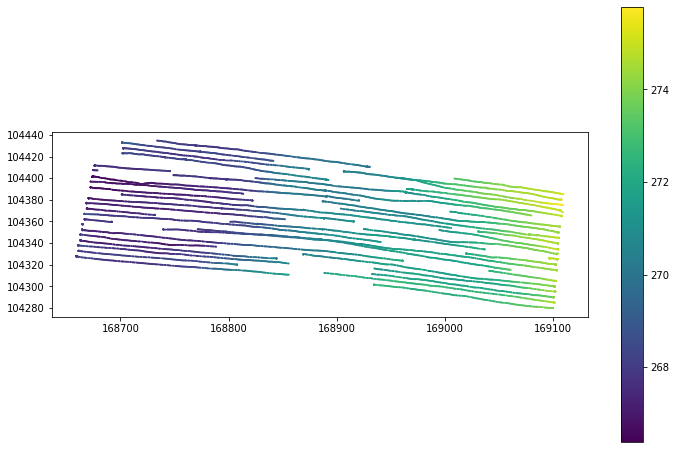

In [48]:
df = pd.read_csv('./data/XYV_example_dataset.csv', sep='\t')
geometry = [Point(xy) for xy in zip(df.Easting, df.Northing)]
crs = 'epsg:31370'
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
gdf=gdf.query('Elevation==Elevation') # remove nan values
fig, ax = plt.subplots(figsize=(12,8))
gdf.plot(ax=ax, column='Elevation', markersize=0.75, legend=True)

## Interpolate values on a grid

set interpolation grid limits, grid size and limits of represented values in plots

In [3]:
xlim = [168650,169150]
ylim = [104250,104450]
vlim = [265, 275]
grid_size = np.array([250, 100])

In [4]:
x, y = np.mgrid[xlim[0]:xlim[1]:1j*grid_size[0], ylim[0]:ylim[1]:1j*grid_size[1]]

set interpolation method, you may try nearest, linear or cubic

In [27]:
method = 'linear'

In [28]:
v = np.flipud(griddata(gdf[['Easting', 'Northing']].values, gdf['Elevation'].values, (x, y), method=method).T)

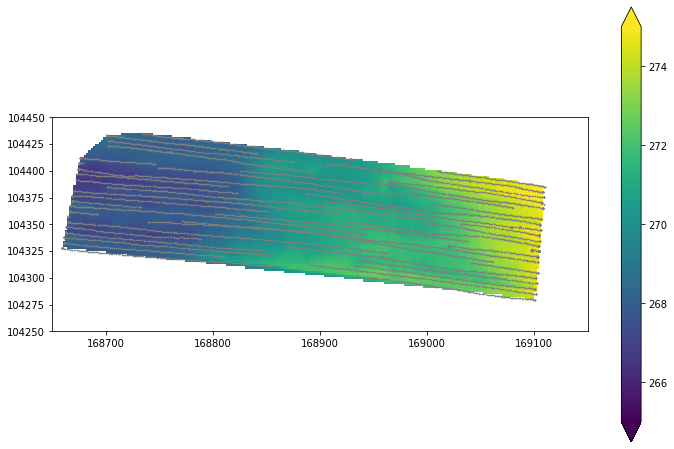

In [46]:
fig, ax = plt.subplots(figsize=(12,8))
im = ax.imshow(v, extent=[xlim[0], xlim[1], ylim[0], ylim[1]], vmin=vlim[0], vmax=vlim[1])
gdf.plot(ax=ax, markersize=0.25, color='grey', legend=False)
fig.colorbar(im, extend='both')

## Alternative method for cubic interpolation that also works on unstructured grids

build the interpolator

In [8]:
interpolation_model = CloughTocher2DInterpolator(gdf[['Easting', 'Northing']].values, gdf['Elevation'].values)

In [9]:
xy = np.column_stack([x.flat, y.flat])

interpolate values at points located at the grid nodes

In [10]:
v = np.flipud(interpolation_model(xy).reshape(grid_size[0],grid_size[1]).T)

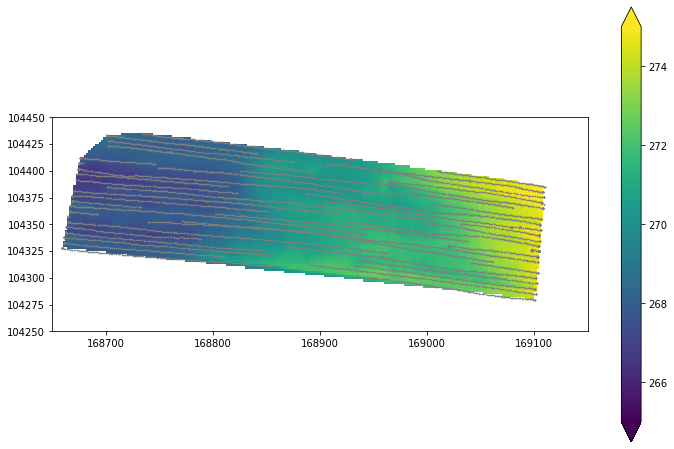

In [47]:
fig, ax = plt.subplots(figsize=(12,8))
im = ax.imshow(v, extent=[xlim[0], xlim[1], ylim[0], ylim[1]], vmin=vlim[0], vmax=vlim[1])
gdf.plot(ax=ax, markersize=0.25, color='grey', legend=False)
plt.colorbar(im, extend='both')